### Giải thích vắn tắc các file dữ liệu
<br>
Dữ liệu sau khi scrawl và gộp lại, kết quả cho ra 7 file, phản ánh những thông tin khác nhau về cháy rừng ở việt nam (không thể gộp thành 1 file chung vì cấu trúc các file có sự khác biệt).
<br>
Thông tin từ bộ dữ liệu chỉ phản ánh từ năm 2011 - 2020
<br>
<blockquote>
1. <b>general_nation_type_forest_year</b> : dữ liệu cho biết thông tin cháy rừng <b>theo năm của từng loại rừng.</b>
<br>
2. <b>general_nation_area_year</b> : dữ liệu cho biết thông tin cháy rừng <b>theo năm của vườn quốc gia.</b>
<br>
3. <b>general_nation_month_year</b> : dữ liệu cho biết thông tin cháy rừng <b>theo từng tháng trong năm.</b>
<br>
4. <b>general_nation_province_year</b> : dữ liệu cho biết thông tin cháy rừng <b>theo năm của từng tỉnh.</b>
<br>
5. <b>general_province_month</b> : dữ liệu cho biết thông tin các vụ cháy rừng <b>theo tháng của từng tỉnh.</b>
<br>
6. <b>general_province_area</b> : dữ liệu cho biết thông tin các vụ cháy rừng <b>theo năm của từng huyện.</b>
<br>
7. <b>Tinh_Forest</b> : lưu trữ tên tỉnh.
</blockquote>

### Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sb

In [2]:
from lib_analytics import showInfoDataFrame, displaySideBySide

In [3]:
data_nation_type_forest = pd.read_csv('data_preprocessing/general_nation_type_forest_year.csv', index_col=0)
showInfoDataFrame(data_nation_type_forest)

(34, 3)


,Loai_Rung,So_Diem_Chay,Nam
0,Sản xuất,6395,2011
1,Phòng hộ,1562,2011
2,Đặc dụng,608,2011


In [4]:
data_nation_area = pd.read_csv('data_preprocessing/general_nation_area_year.csv', index_col=0)
showInfoDataFrame(data_nation_area)

(185, 3)


,Ten_Vuon_Quoc_Gia,So_Diem_Chay,Nam
0,Vườn quốc gia Yok Đôn,281,2011
1,Vườn quốc gia Chư Mom Ray,15,2011
2,Vườn quốc gia Cát Tiên,15,2011


In [5]:
data_nation_month = pd.read_csv('data_preprocessing/general_nation_month_year.csv', index_col=0)
showInfoDataFrame(data_nation_month)

(116, 3)


,Thang,So_Diem_Chay,Nam
0,1,386,2011
1,2,1967,2011
2,3,1292,2011


In [6]:
data_nation_province = pd.read_csv('data_preprocessing/general_nation_province_year.csv', index_col=0)
showInfoDataFrame(data_nation_province)

(528, 3)


,Ma_Tinh,So_Diem_Chay,Nam
0,62,1460,2011
1,64,1082,2011
2,66,926,2011


In [7]:
data_province_month = pd.read_csv('data_preprocessing/general_province_month.csv', index_col=0)
showInfoDataFrame(data_province_month)

(5007, 4)


,Ma_Tinh,Thang,So_Diem_Chay,Nam
0,1,12,1,2011
1,1,12,1,2012
2,1,12,1,2013


In [8]:
data_province_area = pd.read_csv('data_preprocessing/general_province_area.csv', index_col=0)
showInfoDataFrame(data_province_area)

(5103, 4)


,Ma_Tinh,Ten_Huyen,So_Diem_Chay,Nam
0,1,Thạch Thất,1,2011
1,1,Thạch Thất,1,2012
2,1,Thạch Thất,1,2013


### Understanding Data - General

In [9]:
group_nation_province = data_nation_province[['Nam', 'So_Diem_Chay']].groupby('Nam').sum()
group_nation_month = data_nation_month[['Nam', 'So_Diem_Chay']].groupby('Nam').sum()

group_province_month = data_province_month[['Nam', 'So_Diem_Chay']].groupby('Nam').sum()
group_province_area = data_province_area[['Nam', 'So_Diem_Chay']].groupby('Nam').sum()

group_type_forest = data_nation_type_forest[['Nam', 'So_Diem_Chay']].groupby('Nam').sum()
group_nation_area = data_nation_area[['Nam', 'So_Diem_Chay']].groupby('Nam').sum()

dict_fire_forest = {
    'Quốc Gia - Tỉnh': group_nation_province,
    'Quốc Gia - Tháng': group_nation_month,
    
    'Tỉnh - Tháng': group_province_month,
    'Huyện - Năm': group_province_area,
    
    'Loại Rừng': group_type_forest,
    'Vườn Quốc Gia': group_nation_area
}
displaySideBySide(dict_fire_forest)

,So_Diem_Chay
Nam,
2011,8469
2012,11174
2013,8683
2014,11914
2015,11214
2016,11322
2017,42607
2018,384020
2019,436005


Thông kê số điểm cháy từ năm 2011 tới năm 2020

In [10]:
data_nation_month[['Nam', 'Thang']].groupby('Nam').count().T

Nam,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Thang,12,12,12,12,12,12,12,12,12,8


Thống kế số tháng lấy được theo từng năm

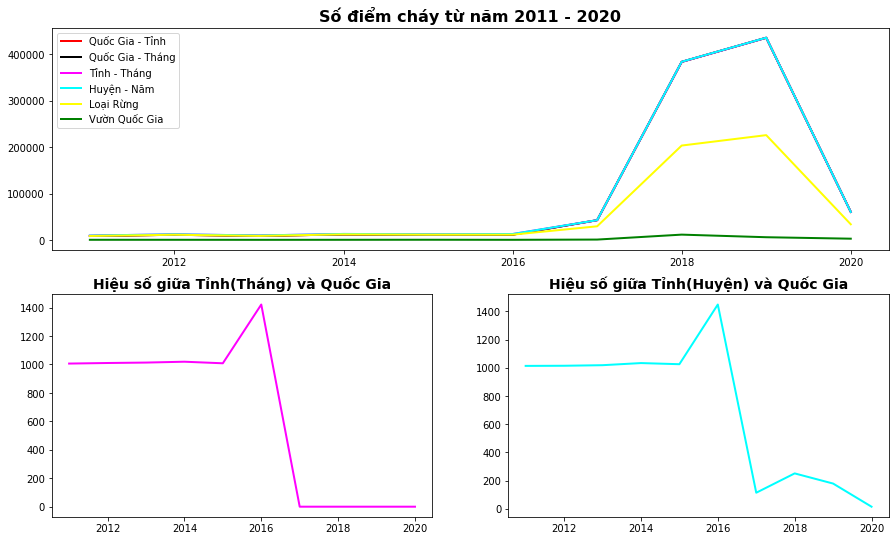

In [11]:
dict_colors = {
    'Quốc Gia - Tỉnh': 'red',
    'Quốc Gia - Tháng': 'black',
    
    'Tỉnh - Tháng': 'magenta',
    'Huyện - Năm': 'cyan',
    
    'Loại Rừng': 'yellow',
    'Vườn Quốc Gia': 'green'
}
plt.figure(figsize=(15,9))
plt.subplot(2, 1, 1)
for name, df in dict_fire_forest.items():
    # rgb = np.random.rand(3,)
    plt.plot(
        df.index, 
        df.values, 
        markerfacecolor='blue', 
        color=dict_colors[name], 
        linewidth=2,
        label=name
    )
plt.title('Số điểm cháy từ năm 2011 - 2020', fontweight='bold', fontsize=16)   
plt.legend()
# ------------
plt.subplot(2, 2, 3)
plt.plot(
    df.index, 
    group_province_month.values - group_nation_month.values, 
    color='magenta', 
    linewidth=2,
    label=name
)
plt.title('Hiệu số giữa Tỉnh(Tháng) và Quốc Gia', fontweight='bold', fontsize=14)  
# ------------
plt.subplot(2, 2, 4)
plt.plot(
    df.index, 
    group_province_area.values - group_nation_month.values, 
    color='cyan', 
    linewidth=2,
    label=name
)
plt.title('Hiệu số giữa Tỉnh(Huyện) và Quốc Gia', fontweight='bold', fontsize=14)    
    
plt.show()

Từ bảng số liệu và biểu đồ trên có thể nhận xét: <br>
<blockquote>
    1. Số điểm cháy ở vườn quốc gia ít hơn đáng kể. <br>
    2. Số điểm cháy tăng mạnh từ năm 2017 - 2019. Năm 2020 chỉ có dữ liệu trong 8 tháng đầu năm, nên chưa có đủ dữ liệu để tổng kết. <br>
    3. Số điểm cháy ở địa phương thường cao hơn ở quốc gia. Từ năm 2017 khác biệt về số điểm cháy giữa quốc gia và địa phương có xu hướng giảm thấp đáng kể.
</blockquote>

In [12]:

group_nation_province = None
group_nation_month = None
group_province_month = None
group_province_area = None
group_type_forest = None
group_nation_area = None


In [13]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
data_nation_month_tsa = data_nation_month
data_nation_month_tsa['Date'] = data_nation_month.apply(lambda row: datetime(int(row.Nam), int(row.Thang), 1), axis = 1)
data_nation_month_tsa = data_nation_month_tsa[['Date', 'So_Diem_Chay']]
data_nation_month_tsa = data_nation_month_tsa.set_index('Date')
# ---------------
result_seasonal = seasonal_decompose(data_nation_month_tsa, model='multiplicative')

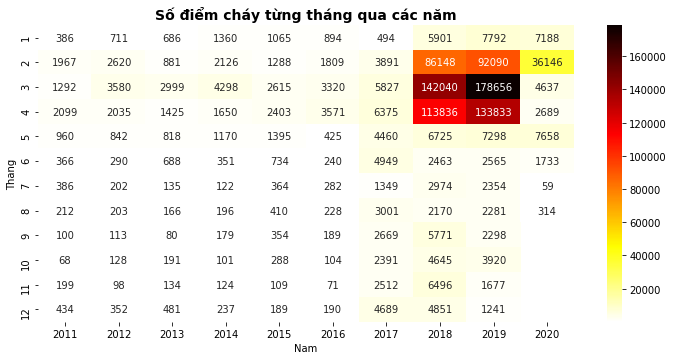

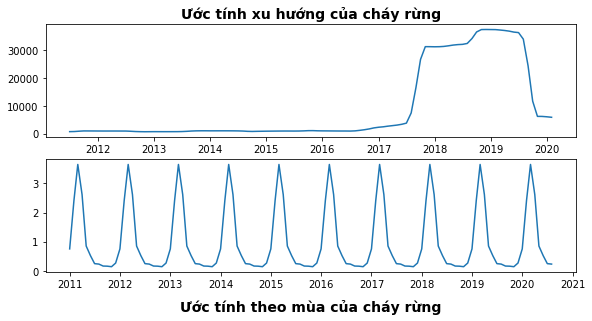

In [15]:
data_pivot = data_nation_month.pivot(
    index='Thang', 
    columns='Nam', 
    values='So_Diem_Chay'
)
plt.figure(figsize=(12, 12))
# -------
plt.subplot(2, 1, 1)
sb.heatmap(
    data_pivot,
    annot=True,
    fmt='1.0f',
    cmap='hot_r',
)
plt.title('Số điểm cháy từng tháng qua các năm', fontweight='bold', fontsize=14)
# ------------
plt.figure(figsize=(9.5, 12))
plt.subplot(5, 1, 4)
plt.plot(
    result_seasonal.trend.index,
    result_seasonal.trend.values
)
# plt.xticks(rotation=90)
plt.title('Ước tính xu hướng của cháy rừng', fontweight='bold', fontsize=14)
# ------------
plt.subplot(5, 1, 5)
plt.plot(
    result_seasonal.seasonal.index,
    result_seasonal.seasonal.values
)
# plt.xticks(rotation=90)
plt.title('Ước tính theo mùa của cháy rừng', fontweight='bold', fontsize=14, y=-0.4)
# ------------
plt.show()

Số điểm cháy có xu hướng theo mùa, cháy nhiều vào những tháng đầu năm và gần cuối năm.
<br>
Từ năm 2011 - 2016: Số điểm cháy tập trung nhiều vào các tháng: 2, 3, 4 với hơn 1000 điểm cháy.
<br>
Từ năm 2017: số điểm cháy bắt đầu tăng lên từ tháng 2 tới tháng 12, nhiều nhất là tháng 4 (6375 điểm cháy), ít nhất là tháng 7 (1349 điểm cháy)
<br>
Từ năm 2018 - 2019: Số điểm cháy đột nhiên tăng mạnh qua các tháng: 1, 2, 3, 4, 5, 11, 12 với hơn 5000 điểm cháy, nhưng nhiều nhất vẫn là 3 tháng 2, 3, 4 với hơn 80000 điểm cháy.

In [16]:
df_province = pd.read_csv('data_preprocessing/Tinh_Forest.csv', index_col=0)
dict_province = {}
for index in range(df_province.shape[0]):
    row = df_province.iloc[index]
    dict_province[row.values[0]] = row.values[1]

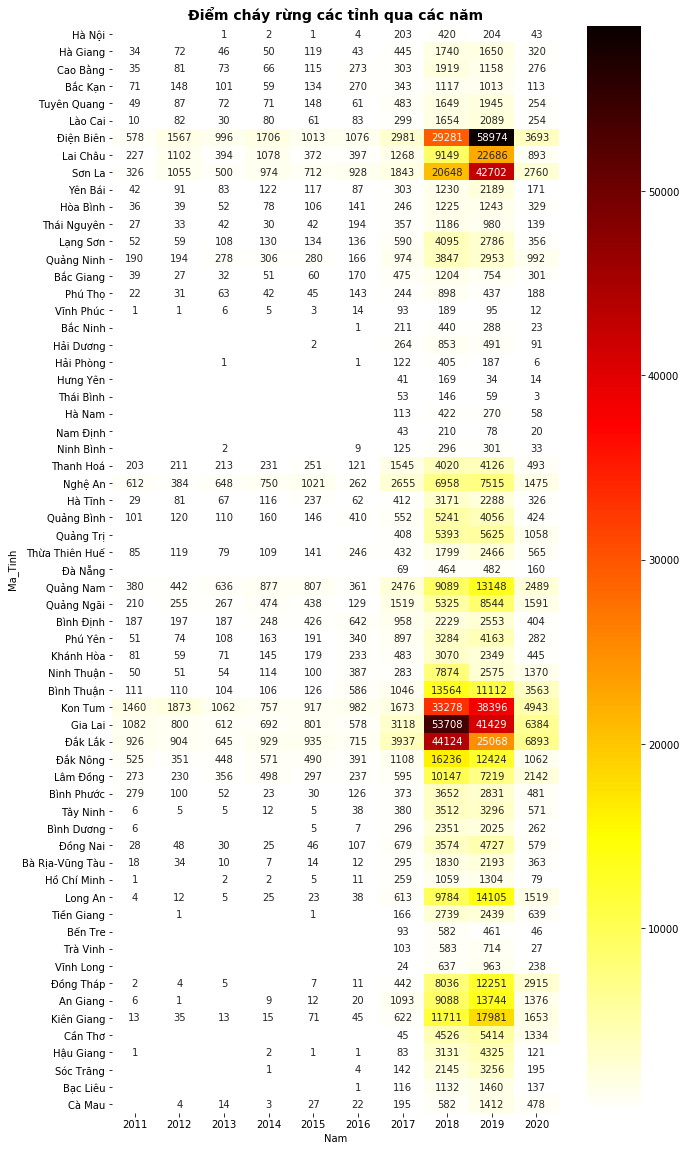

In [17]:
data_pivot = data_nation_province.pivot(
    index='Ma_Tinh', 
    columns='Nam', 
    values='So_Diem_Chay'
)
data_pivot = data_pivot.rename(index=dict_province)
# print(data_pivot.index)
# -------
plt.figure(figsize=(10, 20))
sb.heatmap(
    data_pivot,
    annot=True,
    fmt='1.0f',
    cmap='hot_r'
)
plt.title('Điểm cháy rừng các tỉnh qua các năm', fontweight='bold', fontsize=14)
plt.show()

Chú thích: biểu đồ trên không xắp xếp thứ tự theo ABC vì nhằm để đảm bảo được sự lân cận giữa các vùng miền. <br>
Từ năm 2011 - 2017: Số điểm cháy tập trung nhiều vào các tỉnh: 

> - 'Điện Biên', 'Lai Châu', 'Sơn La' 
<br>
> - 'Nghệ An'
<br>
> - 'Quảng Nam'
<br>
> - 'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông'

Từ năm 2018 - 2019: Số điểm cháy bắt đầu lan rộng và nhiều hơn qua các tỉnh, các tỉnh có hơn 1000 điểm cháy gồm: 

> - 'Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang', 'Lào Cai', 'Điện Biên', 'Lai Châu', 'Sơn La', 'Yên Bái', 'Hòa Bình', 'Thái Nguyên', 'Lạng Sơn', 'Quảng Ninh', 'Bắc Giang'. Trong đó <b>'Điện Biên', 'Lai Châu', 'Sơn La'</b> cháy nhiều nhất, với hơn <b>20000</b> điểm.
<br>
> - 'Thanh Hoá', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên Huế'
<br>
> - 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận', 'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai', 'Bà Rịa-Vũng Tàu', 'Hồ Chí Minh', 'Long An', 'Tiền Giang'. Trong đó <b>'Kon Tum', 'Gia Lai', 'Đắk Lắk'</b> cháy nhiều nhất, với hơn <b>30000</b> điểm.
<br>
> - 'Đồng Tháp', 'An Giang', 'Kiên Giang', 'Cần Thơ', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu'. Trong đó <b>'Kiên Giang'</b> cháy nhiều nhất, với hơn <b>10000</b> điểm.


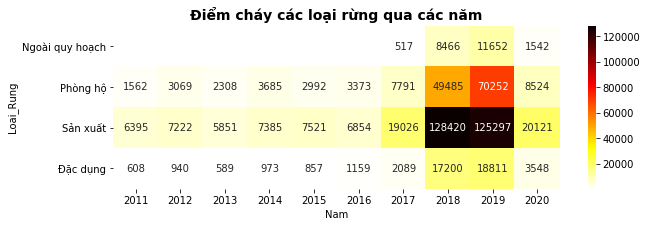

In [18]:
data_pivot = data_nation_type_forest.pivot(
    index='Loai_Rung', 
    columns='Nam', 
    values='So_Diem_Chay'
)
# -------
plt.figure(figsize=(10, 3))
sb.heatmap(
    data_pivot,
    annot=True,
    fmt='1.0f',
    cmap='hot_r'
)
plt.title('Điểm cháy các loại rừng qua các năm', fontweight='bold', fontsize=14)
plt.show()

Biểu đồ phản ánh:
> - <b>Rừng sản xuất</b> có nguy cơ cháy cao hơn các loại rừng khác, với hơn 6000 điểm qua các năm 2011 - 2016, tăng mạnh hơn 19000 điểm vào năm 2017, và hơn 120000 điểm vào năm 2018 - 2019.
<br>
> - Tiếp theo là <b>rừng phòng hộ</b> với hơn 1000 điểm qua các năm 2011 - 2016, tăng mạnh hơn 7000 điểm vào năm 2017, và hơn 49000 điểm vào năm 2018 - 2019.

[Chú tích tham khảo trên wikipedia: ](https://vi.wikipedia.org/wiki/Ph%C3%A2n_lo%E1%BA%A1i_r%E1%BB%ABng_%E1%BB%9F_Vi%E1%BB%87t_Nam)
- Rừng đặc dụng: Là loại rừng được thành lập với mục đích chủ yếu để bảo tồn thiên nhiên, mẫu chuẩn hệ sinh thái rừng của quốc gia, nguồn gen sinh vật rừng, nghiên cứu khoa học, bảo vệ di tích lịch sử, danh lam thắng cảnh phục vụ nghỉ ngơi du lịch kết hợp với phòng hộ bảo vệ môi trường sinh thái. Xem thêm Rừng đặc dụng
- Rừng phòng hộ: Là rừng được sử dụng chủ yếu để bảo vệ nguồn nước, bảo vệ đất, chống xói mòn, chống sa mạc hóa, hạn chế thiên tai, điều hòa khí hậu, bảo vệ môi trường. Xem thêm Rừng phòng hộ
- Rừng sản xuất: Là rừng được dùng chủ yếu trong sản xuất gỗ,lâm sản,đặc sản.

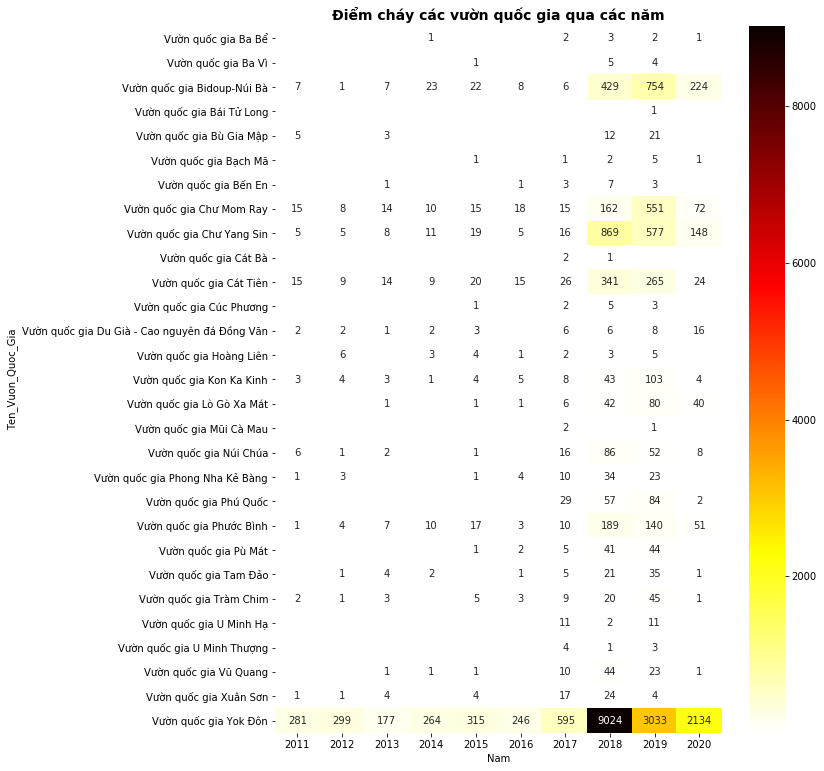

In [19]:
data_pivot = data_nation_area.pivot(
    index='Ten_Vuon_Quoc_Gia', 
    columns='Nam', 
    values='So_Diem_Chay'
)
# -------
plt.figure(figsize=(10, 13))
sb.heatmap(
    data_pivot,
    annot=True,
    fmt='1.0f',
    cmap='hot_r'
)
plt.title('Điểm cháy các vườn quốc gia qua các năm', fontweight='bold', fontsize=14)
plt.show()

Từ năm 2011 - 2017, vườn quốc gia Yok Dôn có số điềm cháy nhiều hơn các vườn quốc gia còn lại, với hơn 200 điểm cháy.<br>
Từ năm 2017 - 2019, số điềm cháy tăng lên ở các vườn quốc gia:
<blockquote>
    - Vườn quốc gia Yok Đôn (thuộc tỉnh 'Đắk Lắk', 'Đắk Nông'), 9024 điểm năm 2018, 3033 điểm năm 2019, 2134 điểm trong 8 tháng đầu năm 2020. <br>
    - Vườn quốc gia Bidoup - Núi Bà (thuộc tỉnh 'Lâm Đồng'), 429 điểm năm 2018, 754 điểm năm 2019. <br>
    - Vườn quốc gia Mon Ray (thuộc tỉnh 'Kon Tum'), 162 điểm năm 2018, 551 điểm năm 2019. <br>
    - Vườn quốc gia Yang Sin (thuộc tỉnh 'Đắk Lắk'), 869 điểm năm 2018, 577 điểm năm 2019. <br>
    - Vườn quốc gia Cát Tiên (thuộc tỉnh 'Lâm Đồng'), 341 điểm năm 2018, 265 điểm năm 2019.
</blockquote>

### Understanding Data - Detail

In [20]:
df_province_month = data_province_month[
    ['Nam', 'Thang', 'So_Diem_Chay']
].groupby(
    by=['Nam', 'Thang'], 
    as_index=False
).sum()

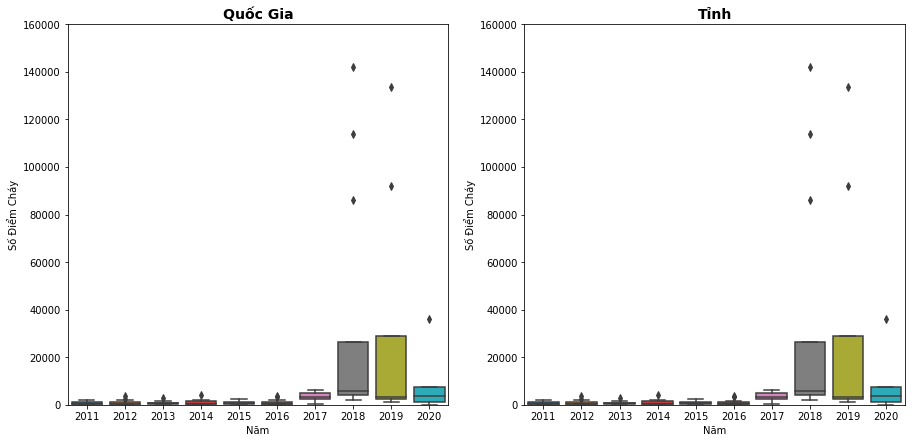

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sb.boxplot(
    x="Nam", 
    y="So_Diem_Chay", 
    # data=data_nation_month
    data=data_nation_month
)
plt.xlabel('Năm')
plt.ylabel('Số Điểm Cháy')
plt.title('Quốc Gia', fontweight='bold', fontsize=14)
plt.ylim(0, 160000)
plt.subplot(1,2,2)
sb.boxplot(
    x="Nam", 
    y="So_Diem_Chay", 
    # data=data_province_month
    data=df_province_month
)
plt.xlabel('Năm')
plt.ylabel('Số Điểm Cháy')
plt.title('Tỉnh', fontweight='bold', fontsize=14)
plt.ylim(0, 160000)
plt.show()

Theo thống kê outlier về số lượng điểm cháy của quốc gia và địa phương theo năm có thể thấy:
<blockquote>
    - Các outlier từ năm 2011 - 2017, mặc dù có năm có outlier nhưng giá trị outlier gần với max của mỗi năm. <br>
    - Các outlier từ năm 2018 - 2020, lại có giá trị cao hơn rất nhiều so với max của mỗi năm. <br>
    - IQR và max của năm 2018, 2019 nhiều và cao hơn các năm còn lại. 
</blockquote>    

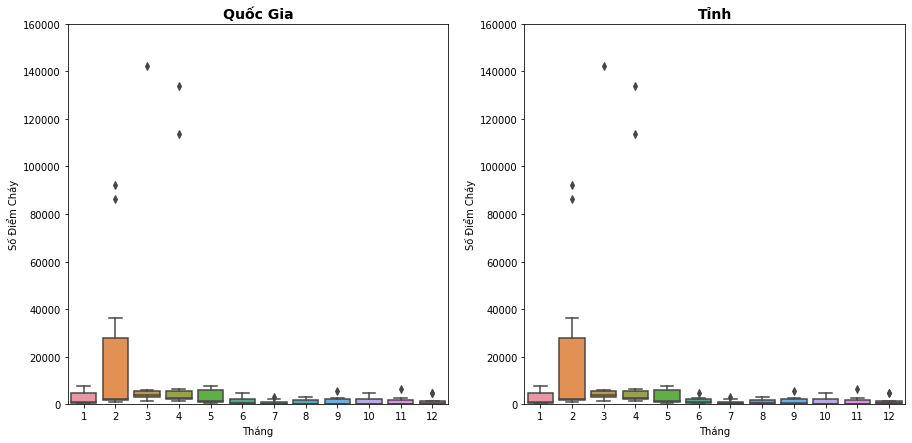

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sb.boxplot(
    x="Thang", 
    y="So_Diem_Chay", 
    # data=data_nation_month
    data=data_nation_month
)
plt.xlabel('Tháng')
plt.ylabel('Số Điểm Cháy')
plt.title('Quốc Gia', fontweight='bold', fontsize=14)
plt.ylim(0, 160000)
plt.subplot(1,2,2)
sb.boxplot(
    x="Thang", 
    y="So_Diem_Chay", 
    # data=data_province_month
    data=df_province_month
)
plt.xlabel('Tháng')
plt.ylabel('Số Điểm Cháy')
plt.title('Tỉnh', fontweight='bold', fontsize=14)
plt.ylim(0, 160000)
plt.show()

Theo thống kê outlier về số lượng điểm cháy của quốc gia và địa phương theo tháng có thể thấy:
<blockquote>
    - Các outlier vào tháng 2, 3, 4 có giá trị cao hơn rất nhiều so với max của mỗi tháng. <br>
    - Các outlier các thàng còn lại có giạ tri gần với max của mỗi tháng. <br>
    - IQR và max của tháng 2 nhiều và cao hơn các tháng còn lại. <br>
</blockquote>   

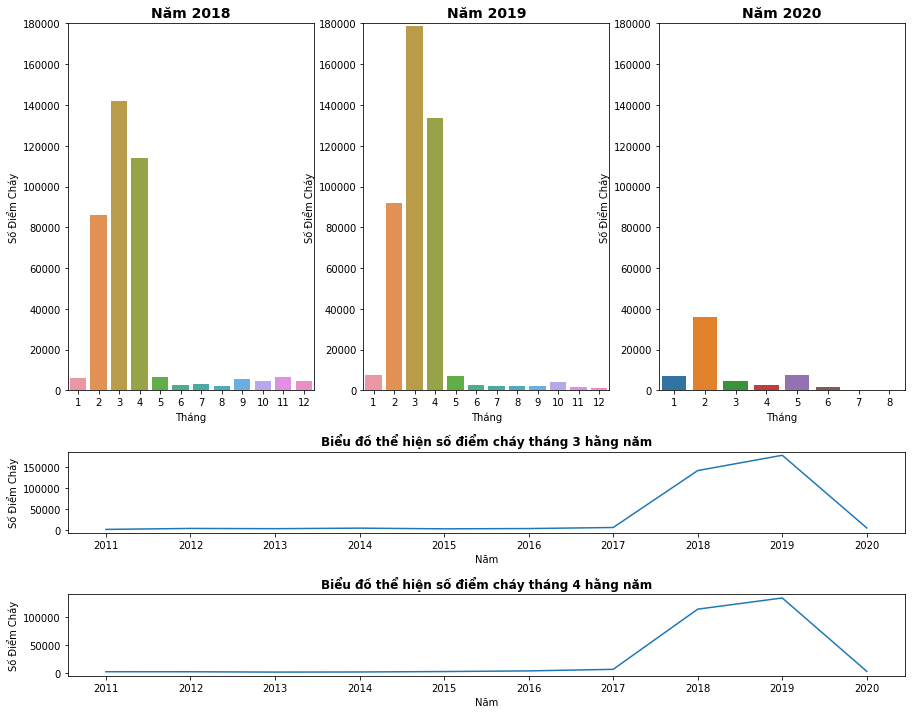

In [23]:
df_province_month = data_province_month[
    ['Nam', 'Thang', 'So_Diem_Chay']
].groupby(
    by=['Nam', 'Thang'], 
    as_index=False
).sum()
# ----------
fig = plt.figure(figsize=(15,12))
gs = GridSpec(5, 3, figure=fig, hspace=0.75)
# ----------
for index, value in [(0, 2018), (1, 2019), (2, 2020)]:
    # plt.subplot(1,3, index)
    ax = fig.add_subplot(gs[:3, index])
    sb.barplot(
        x="Thang", 
        y="So_Diem_Chay", 
        data=df_province_month[df_province_month.Nam == value],
        ax = ax
    )
    plt.title('Năm '+ str(value), fontweight='bold', fontsize=14)
    plt.ylim(0, 180000)
    plt.xlabel('Tháng')
    plt.ylabel('Số Điểm Cháy')
# ----------    
ax2 = fig.add_subplot(gs[3, 0:])
sb.lineplot(
    x="Nam", 
    y="So_Diem_Chay", 
    data=df_province_month[df_province_month.Thang == 3],
    ax = ax2
)
plt.xlabel('Năm')
plt.ylabel('Số Điểm Cháy')
plt.xticks(range(2011, 2021))
plt.title('Biểu đồ thể hiện số điểm cháy tháng 3 hằng năm', fontweight='bold', fontsize=12)
# ----------  
ax3 = fig.add_subplot(gs[4, 0:])
sb.lineplot(
    x="Nam", 
    y="So_Diem_Chay", 
    data=df_province_month[df_province_month.Thang == 4],
    ax = ax3
)
plt.xlabel('Năm')
plt.ylabel('Số Điểm Cháy')
plt.xticks(range(2011, 2021))
plt.title('Biểu đồ thể hiện số điểm cháy tháng 4 hằng năm', fontweight='bold', fontsize=12)
# ----------  
plt.show()

Từ những biểu đồ trên có thể thấy, 3 năm 2018, 2019, 2020 có số lượng điểm cháy cao bất thường. Vì vậy, biễu đồ này sẽ đặc biệt lấy 3 năm này để phân tích thêm.
<blockquote>
    - Số điềm cháy tháng 2, 3, 4 vào 2 năm 2018, 2019 rất cao. <br>
    - Nhưng năm 2020 giảm thấp đáng kể, đặc biệt là 2 tháng 3, 4.
</blockquote>    

In [24]:
def getProvinceTopFire(df):
    return df[[
            'Ma_Tinh', 'Ten_Tinh', 'So_Diem_Chay'
        ]].groupby(
            by=['Ma_Tinh', 'Ten_Tinh'], 
            as_index=False
        ).sum().sort_values(
            by='So_Diem_Chay', 
            ascending=False
        ).head(7)

def getNameProvince(df):
    return tuple(df['Ten_Tinh'].values.tolist())

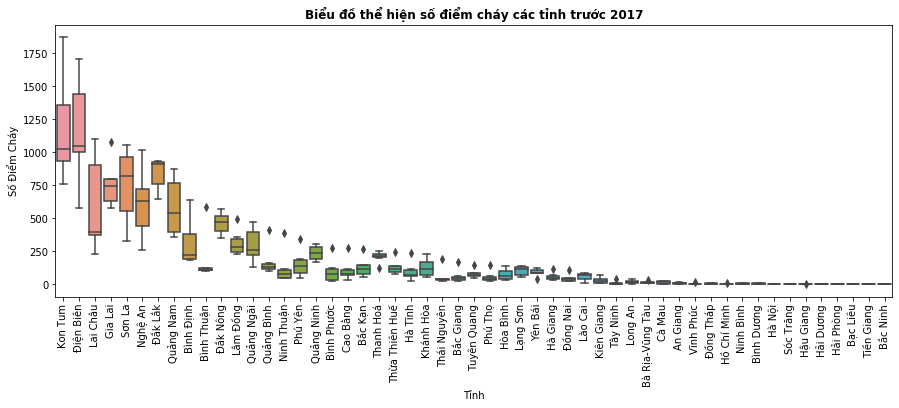

In [31]:
df_nation_province_before_2017 = data_nation_province[data_nation_province.Nam < 2017][['So_Diem_Chay', 'Ma_Tinh']]
df_nation_province_before_2017['Ten_Tinh'] = data_nation_province.Ma_Tinh.replace(dict_province)
df_nation_province_before_2017 = df_nation_province_before_2017.sort_values(by='So_Diem_Chay', ascending=False)
# --------
fig = plt.figure(figsize=(15,5))
sb.boxplot(
    x="Ten_Tinh", 
    y="So_Diem_Chay", 
    data=df_nation_province_before_2017
)
plt.xlabel('Tỉnh')
plt.ylabel('Số Điểm Cháy')
plt.title('Biểu đồ thể hiện số điểm cháy các tỉnh trước 2017', fontweight='bold', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [26]:
print(
    getNameProvince(
        getProvinceTopFire(
            df_nation_province_before_2017
        )
    ), 
    'là 7 tỉnh có số điểm cháy nhiều nhất trước năm 2017'
)  

('Kon Tum', 'Điện Biên', 'Đắk Lắk', 'Gia Lai', 'Sơn La', 'Nghệ An', 'Lai Châu') là 7 tỉnh có số điểm cháy nhiều nhất trước năm 2017


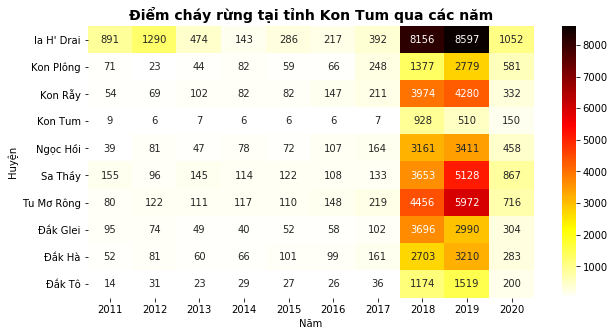

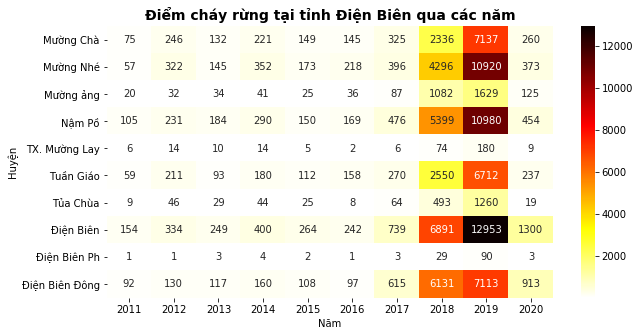

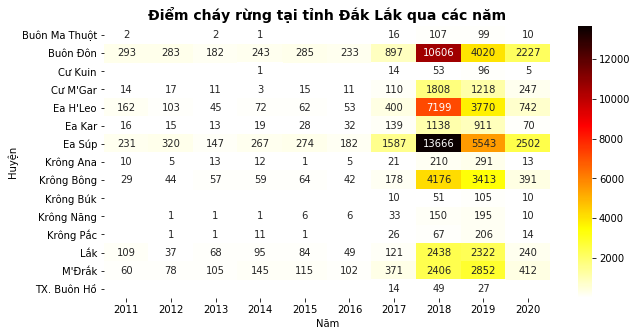

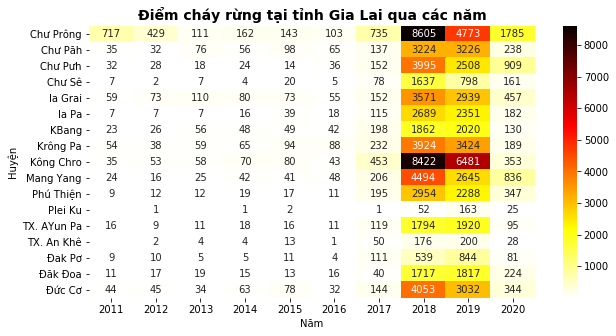

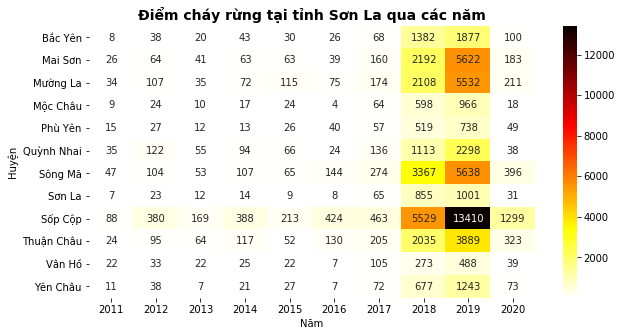

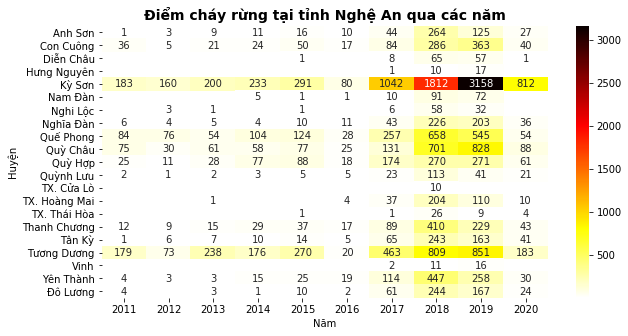

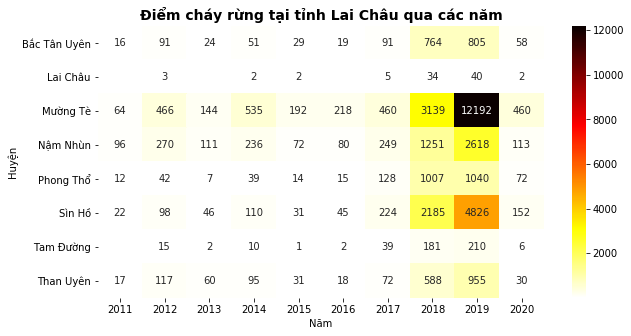

In [27]:
df_province_head = getProvinceTopFire(df_nation_province_before_2017)
for index in range(0, df_province_head.shape[0]):
    name_province = df_province_head.iloc[index, 1]
    data_pivot = data_province_area[data_province_area.Ma_Tinh == df_province_head.iloc[index, 0]].pivot(
        index='Ten_Huyen', 
        columns='Nam', 
        values='So_Diem_Chay'
    )
    # -------
    plt.figure(figsize=(10, int(data_pivot.shape[1]/2)))
    sb.heatmap(
        data_pivot,
        annot=True,
        fmt='1.0f',
        cmap='hot_r'
    )
    plt.xlabel('Năm')
    plt.ylabel('Huyện')
    plt.title('Điểm cháy rừng tại tỉnh {} qua các năm'.format(name_province), fontweight='bold', fontsize=14)
plt.show()

Trên đây là thông tin số điểm cháy ở huyện của 7 tỉnh cháy nhiều nhất trước năm 2017

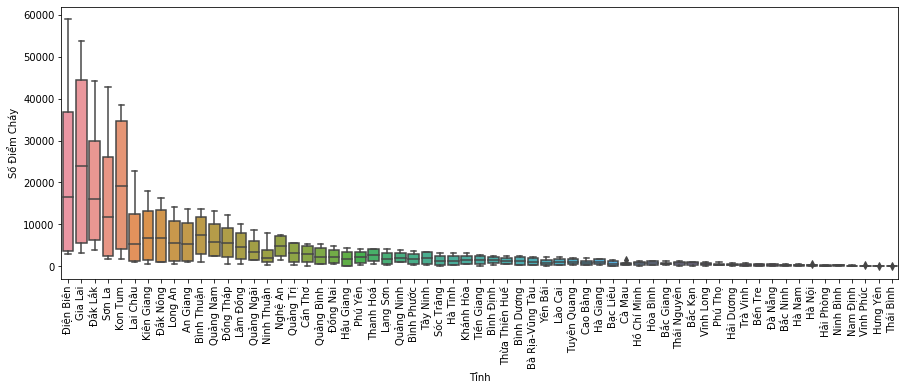

In [28]:
df_nation_province_after_2017 = data_nation_province[data_nation_province.Nam >= 2017][['So_Diem_Chay', 'Ma_Tinh']]
df_nation_province_after_2017['Ten_Tinh'] = data_nation_province.Ma_Tinh.replace(dict_province)
df_nation_province_after_2017 = df_nation_province_after_2017.sort_values(by='So_Diem_Chay', ascending=False)
# --------
fig = plt.figure(figsize=(15,5))
sb.boxplot(
    x="Ten_Tinh", 
    y="So_Diem_Chay", 
    data=df_nation_province_after_2017
)
plt.xlabel('Tỉnh')
plt.ylabel('Số Điểm Cháy')
plt.title('Biểu đồ thể hiện số điểm cháy các tỉnh sau 2017', fontweight='bold', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [29]:
print(
    getNameProvince(
        getProvinceTopFire(
            df_nation_province_after_2017
        )
    ), 
    'là 7 tỉnh có số điểm cháy nhiều nhất sau năm 2017'
)

('Gia Lai', 'Điện Biên', 'Đắk Lắk', 'Kon Tum', 'Sơn La', 'Lai Châu', 'Kiên Giang') là 7 tỉnh có số điểm cháy nhiều nhất sau năm 2017


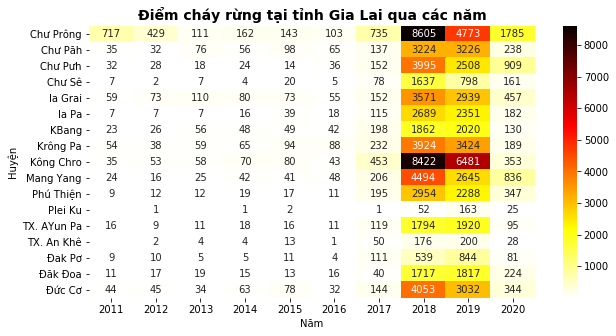

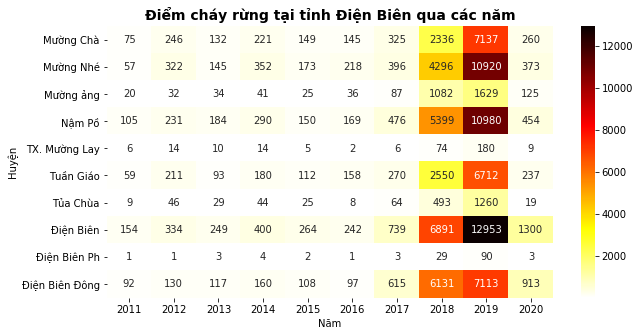

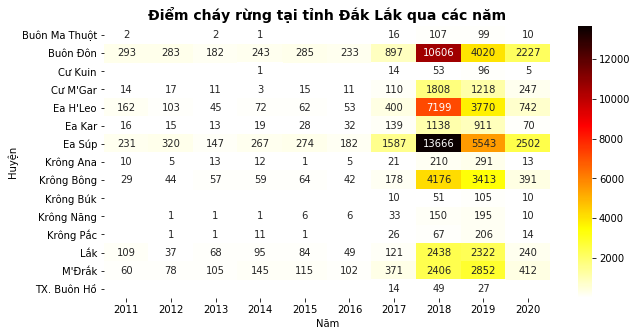

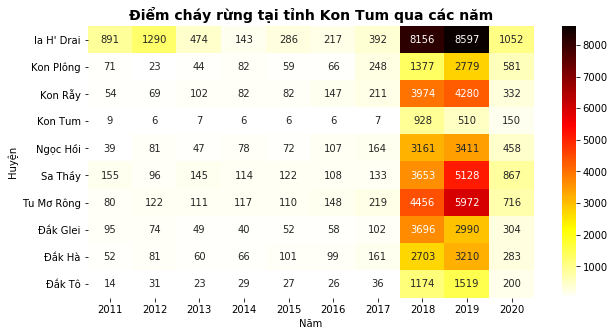

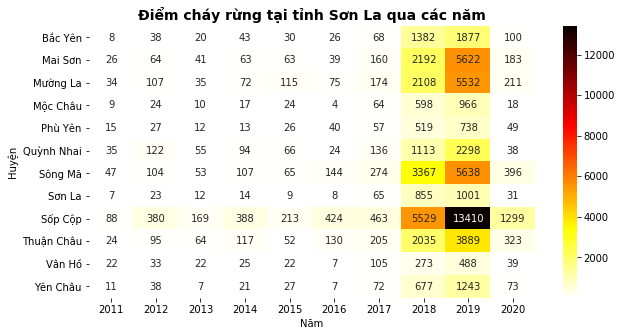

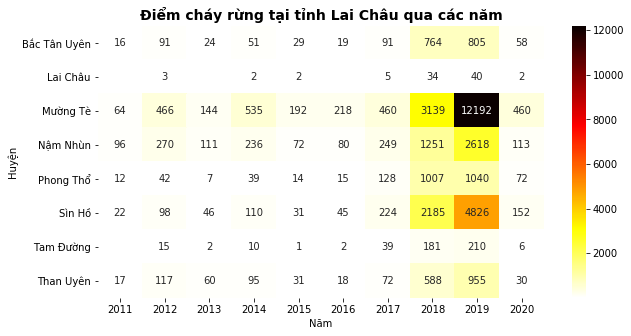

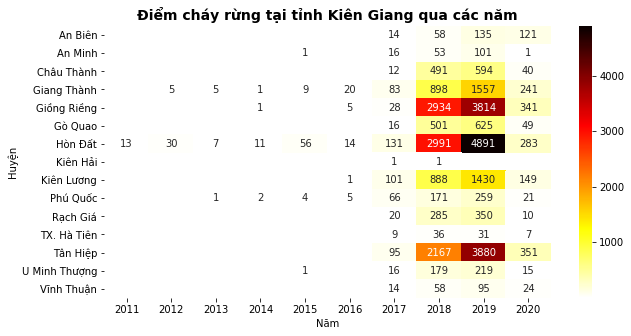

In [30]:
df_province_head = getProvinceTopFire(df_nation_province_after_2017)
for index in range(0, df_province_head.shape[0]):
    name_province = df_province_head.iloc[index, 1]
    data_pivot = data_province_area[data_province_area.Ma_Tinh == df_province_head.iloc[index, 0]].pivot(
        index='Ten_Huyen', 
        columns='Nam', 
        values='So_Diem_Chay'
    )
    # -------
    plt.figure(figsize=(10, int(data_pivot.shape[1]/2)))
    sb.heatmap(
        data_pivot,
        annot=True,
        fmt='1.0f',
        cmap='hot_r'
    )
    plt.xlabel('Năm')
    plt.ylabel('Huyện')
    plt.title('Điểm cháy rừng tại tỉnh {} qua các năm'.format(name_province), fontweight='bold', fontsize=14)
plt.show()

Trên đây là thông tin số điểm cháy ở huyện của 7 tỉnh cháy nhiều nhất sau năm 2017